## **New Delhi Climate Data Forecasting**

Proyek ini berisi tentang pembuatan model yang mampu melakukan peramalan/forecasting. Data yang digunakan adalah data iklim harian di Kota New Delhi.
Dataset dapat dilihat dan diunduh pada laman berikut : https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

## Impor Data dan Modul 

In [139]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

## Pembersihan Data dan Visualisasi Data

Selanjutnya kita akan mencoba mengimpor data dari direktori. Data berikut berisi data iklim dari tahun 2013 hingga 2017 di India. Kita akan melakukan prediksi terhadap data ini. Pertama-tama kita akan membuka filenya dalam bentuk dataframe. Ada dua csv, satu csv berisi data untuk pelatihan model dan satu csv untuk pengujian model.

In [140]:
train_df  = pd.read_csv('D:\Google Bangkit Batch 1 2024\My Project\Climate Predictions\Datasets\DailyDelhiClimateTrain.csv')
test_df = pd.read_csv('D:\Google Bangkit Batch 1 2024\My Project\Climate Predictions\Datasets\DailyDelhiClimateTest.csv')

#mwngubah data date menjadi tipe DateTime
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

#jadikan kolom data menjadi index
train_df.set_index('date',inplace = True)

#Lakukan hal yang sama untuk test set
test_df.set_index('date', inplace =True)



<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\INTEL\AppData\Local\Temp\ipykernel_10828\2293252477.py:1: SyntaxWarning: invalid escape sequence '\G'
  train_df  = pd.read_csv('D:\Google Bangkit Batch 1 2024\My Project\Climate Predictions\Datasets\DailyDelhiClimateTrain.csv')
C:\Users\INTEL\AppData\Local\Temp\ipykernel_10828\2293252477.py:2: SyntaxWarning: invalid escape sequence '\G'
  test_df = pd.read_csv('D:\Google Bangkit Batch 1 2024\My Project\Climate Predictions\Datasets\DailyDelhiClimateTest.csv')


Akan dicek apakah terdapat nilai NaN pada data

In [141]:
train_df.isna().sum()


meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Sel berikut akan menunjukkan 10 data pertama dari masing-masing variabel untuk kedua file CSV

In [142]:
#Mengecek sepuluh data pertama dari file csv train
print(train_df.head(10))

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
2013-01-06   7.000000  82.800000    1.480000   1018.000000
2013-01-07   7.000000  78.600000    6.300000   1020.000000
2013-01-08   8.857143  63.714286    7.142857   1018.714286
2013-01-09  14.000000  51.250000   12.500000   1017.000000
2013-01-10  11.000000  62.000000    7.400000   1015.666667


In [143]:
#mengecek sepuluh data pertama dari file CSV test
print(test_df.head(10))

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333
2017-01-06  19.318182  79.318182    8.681818   1011.772727
2017-01-07  14.708333  95.833333   10.041667   1011.375000
2017-01-08  15.684211  83.526316    1.950000   1015.550000
2017-01-09  14.571429  80.809524    6.542857   1015.952381
2017-01-10  12.111111  71.944444    9.361111   1016.888889


Berdasarkan hasil pengecekan, telah diketahui bahwa seluruh variabel yang ada pada data memiliki tipe data yang sesuai yaitu data bilangan. Selanjutnya, akan dibuat grafik untuk mengetahui polanya. Disini kita hanya akan menggunakan 1 variabel untuk diprediksi yaitu rata-rata suhu (mean temperature).

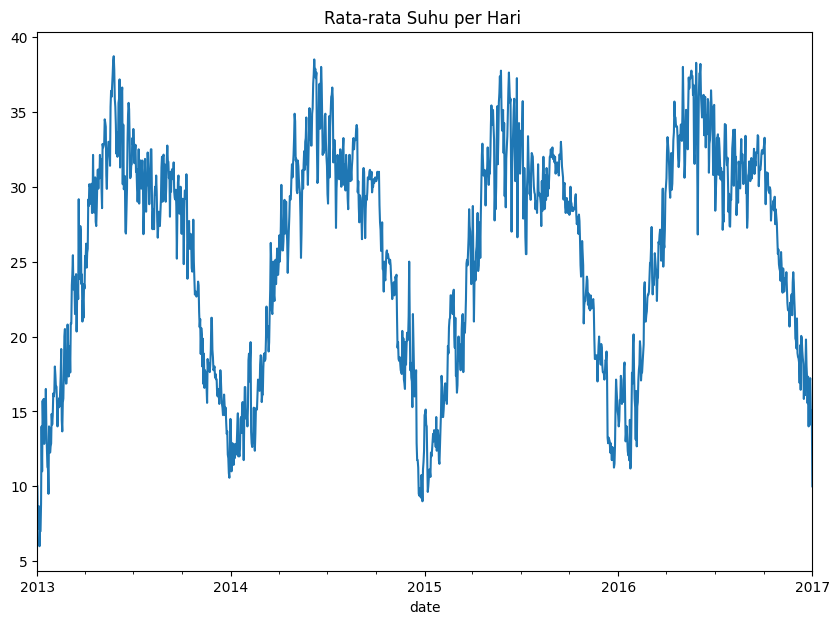

In [144]:
#memplotting data mean temperature
plt.figure(figsize = (10,7))
train_df['meantemp'].plot()
plt.title('Rata-rata Suhu per Hari ')
plt.show()

## **Penyiapan data**

Berdasarkan grafik, kita dapat melihat bahwa terdapat pola berulang untuk setiap tahun. Tahapan selanjutnya adalah untuk mengajari mesin bagaimana mengenali pola-pola ini dan bagaimana memprediksi pola-pola selanjutnya di bulan-bulan mendatang. Kita akan menyiapkan data dengan menormalisasi data serta melakukan pembagian antara data uji dan data latih

Lakukan normalisasi pada dataset, kemudian dibuat sebuah fungsi khusus untuk menyiapkan dataset 

In [145]:
#lakukan normalisasi data
scaler = MinMaxScaler(feature_range=(0,1))
meantemp_data = pd.DataFrame(train_df['meantemp']).values
data_scaled_meantemp = scaler.fit_transform(meantemp_data)

def prepare_dataset(dataset,time_step = 1):
    data_x,data_y = [],[]
    for i in range(len(dataset)-time_step-1):
        data = dataset[i:(i+time_step),0]
        data_x.append(data)
        data_y.append(dataset[i+time_step,0])
    return np.array(data_x),np.array(data_y)

In [146]:
#Kita gunakan fungsi diatas untuk menyiapkan dataset yang kita punya
time_step = 10
x,y =prepare_dataset(data_scaled_meantemp,time_step)

#Reshape input data (x) menjadi [samples,time steps,features] untuk model sequential
x = x.reshape(x.shape[0],x.shape[1],1)

#lakukan pembagian data uji dan data latih untuk dataset 'train_df'
train_size = int(len(x)*0.8) #proporsi data latih 80%

x_train,y_train = x[:train_size],y[:train_size]
x_test,y_test = x[train_size:],y[train_size:]



## **Pembuatan Model**

Setelah mempersiapkan data, kita akan melanjutkan tahapan ke pembuatan model. Pembuatan model ini dilakukan dengan menggunakan pustaka Tensorflow. Untuk saat ini, kita akan mencoba membuat model dengan tipe layer LSTM (Long-Short Term Memory)

In [147]:
#Impor tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [148]:
#membuat model LSTM untuk prediksi suhu rata-rata
meantemp_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(70,activation='relu',return_sequences = True,input_shape= (x_train.shape[1], 1)),
    tf.keras.layers.LSTM(50,activation='relu',return_sequences = True),
    tf.keras.layers.LSTM(30,activation='relu'),
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(1)
]
)

history = meantemp_model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']
)

#ringkasan model
meantemp_model.summary()

c:\Users\INTEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 70)         │        20,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 50)         │        24,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30)             │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,041 (215.00 KB)

 Trainable params: 55,041 (215.00 KB)

 Non-trainable params: 0 (0.00 B)

Kode berikut untuk melatih model terhadap data temperatur rata-rata (mean temperature).

In [149]:
tf.keras.backend.clear_session()
batch_size = 10
meantemp_model.fit(x_train,y_train,batch_size = 10, epochs =30,steps_per_epoch = len(x_train)//batch_size)
meantemp_model.save('models/meantemp_model.h5')

Epoch 1/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1359 - mae: 0.2787
Epoch 2/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 69us/step - loss: 0.0000e+00 - mae: 0.0000e+00
Epoch 3/30
 21/116 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mae: 0.0625

c:\Users\INTEL\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0064 - mae: 0.0641
Epoch 4/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 34us/step - loss: 0.0000e+00 - mae: 0.0000e+00
Epoch 5/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0072 - mae: 0.0683
Epoch 6/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 34us/step - loss: 0.0000e+00 - mae: 0.0000e+00
Epoch 7/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mae: 0.0612
Epoch 8/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - loss: 0.0000e+00 - mae: 0.0000e+00
Epoch 9/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060 - mae: 0.0624
Epoch 10/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 34us/step - loss: 0.0000e+00 - mae: 0.0000e+00
Epoch 11/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0059 - mae: 0.0591
Epoch 12/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 43us/step - loss: 0.0000e+00 - mae: 0.0000e+00
Epoch 13/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0058 - mae: 0.0605
Epoch 14/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 34us/step - loss: 0.0000e+0

Selanjutnya, kita akan lakukan prediksi data suhu rata-rata dari data uji.

In [150]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predictions = meantemp_model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


Kita akan ubah data dari hasil predictions kembali ke skala awal dengan menggunakan scaler.inverse_transform.

In [151]:
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

Selanjutnya kita bandingkan data hasil prediksi dengan data aktual untuk file Train.csv.

In [152]:
compare_pred_act = pd.DataFrame(data = {"Predictions":predictions.flatten(),
                                        "Actual":y_test.flatten()})
compare_pred_act

                                        

,Predictions,Actual
0,24.725674,23.937500
1,24.567102,26.312500
2,24.810169,26.187500
3,25.372494,26.785714
4,25.938234,27.133333
...,...,...
286,17.018547,16.850000
287,16.797678,17.217391
288,16.721600,15.238095
289,16.675230,14.095238


Kita akan lakukan perhitungan nilai error dari data-data pada tabel diatas dengan menggunakan Root Mean Squared Error. 

In [153]:
RMSE = np.sqrt(np.mean(y_test - predictions)**2).round(2)
RMSE

0.73

## Visualisasi Data Perbandingan Hasil Prediksi dengan Nilai Aktual

Untuk lebih mempermudah kita melihat seberapa jauh antara nilai hasil prediksi dan nilai dari data sebenarnya, akan dibuat sebuah visualisasi dalam bentuk grafik garis.

Untuk penyajian data terakhir, kita gabungkan hasil prediksi dengan hasil data training dengan label yang tepat yaitu tanggal

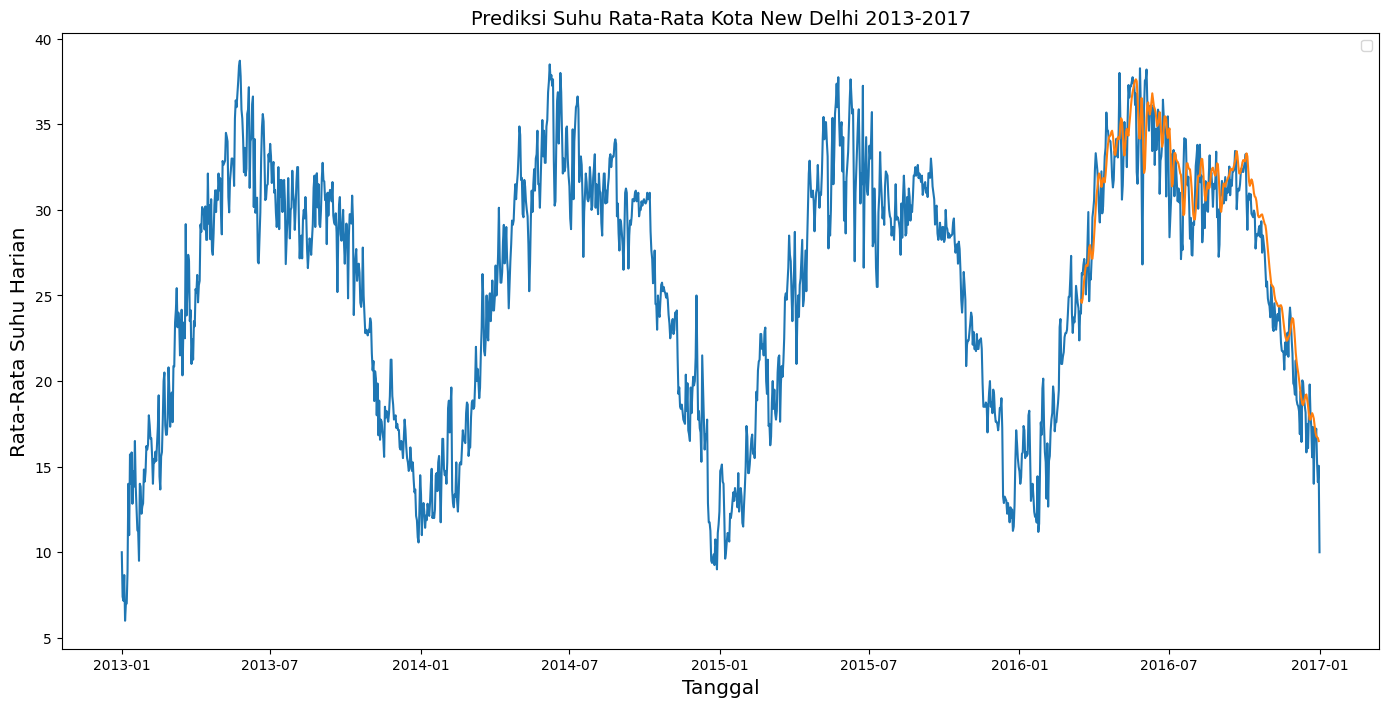

In [178]:
end_date = '2016-12-31'

num_periods = len(compare_pred_act['Actual'])

date_range = pd.date_range(end = end_date, periods = num_periods, freq = 'D')

#ganti indeks pada compare_pred_act dengan date range
compare_pred_act.index = date_range

#plot data dengan label tanggal yang tepat 
plt.figure(figsize = (17,8))
plt.plot(train_df['meantemp'])
plt.plot(compare_pred_act["Predictions"])
plt.xlabel('Tanggal',fontsize=14.5)
plt.ylabel('Rata-Rata Suhu Harian',fontsize = 14.5)
plt.title('Prediksi Suhu Rata-Rata Kota New Delhi 2013-2017',fontsize = 14)
plt.legend()
plt.show()

Grafik garis diatas menunjukkan data rata-rata suhu, kita menggunakan data latih dari tahun 2013 hingga tanggal 15 Maret 2016 dan menguji forecasting pada sisa tanggal selanjutnya. Garis yang berwarna biru adalah nilai asli yang didapatkan dari CSV sedangkan garis berwarna oranye adalah hasil prediksi dari model.